# Import

In [18]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [3]:
apply_train = pd.read_csv('open/apply_train.csv')
company = pd.read_csv('open/company.csv')
recruitment = pd.read_csv('open/recruitment.csv')
resume_certificate = pd.read_csv('open/resume_certificate.csv')
resume_education = pd.read_csv('open/resume_education.csv')
resume = pd.read_csv('open/resume.csv')

# EDA

## apply_train

In [8]:
apply_train.shape
# (57946,2)

(57946, 2)

In [4]:
apply_train.describe()
# resume_seq 고유 : 8482
# recruitment_seq 고유 : 6695

,resume_seq,recruitment_seq
count,57946,57946
unique,8482,6695
top,U06543,R03237
freq,77,78


In [6]:
apply_train.isnull().sum()
# 결측치 

resume_seq         0
recruitment_seq    0
dtype: int64

## company

In [10]:
company.shape
# (2377,4)

(2377, 4)

In [11]:
company.describe()
# 회사 업종과 직원수

,company_type_seq,supply_kind,employee
count,2377.000000,2377.000000,2377.000000
mean,2.944468,344.090029,217.696676
std,1.739406,131.232212,331.153073
min,2.000000,100.000000,0.000000
25%,2.000000,402.000000,41.000000
50%,2.000000,402.000000,145.000000
75%,4.000000,402.000000,300.000000
max,9.000000,605.000000,12223.000000


In [12]:
company.isnull().sum()
# 결측치 0

recruitment_seq     0
company_type_seq    0
supply_kind         0
employee            0
dtype: int64

Text(0.5, 1.0, 'Employee')

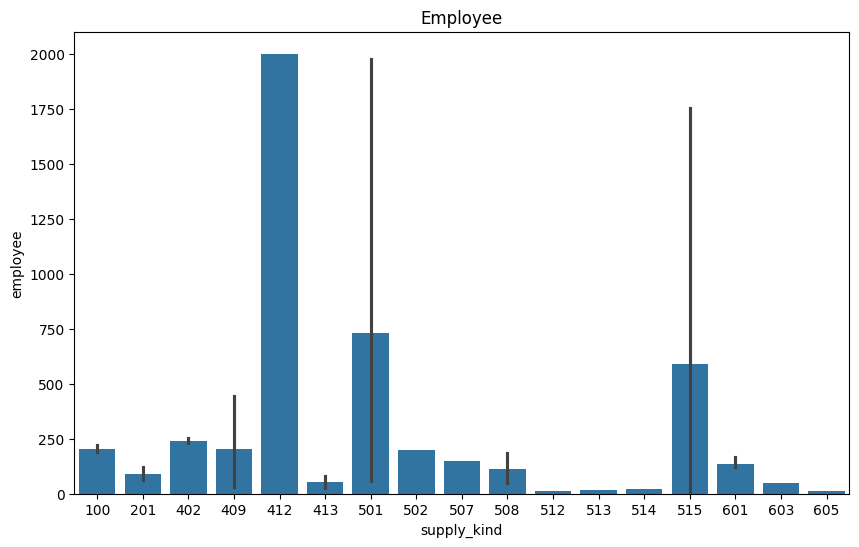

In [20]:
# 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정

# seaborn을 사용하여 막대 그래프 그리기
sns.barplot(x='supply_kind', y='employee', data=company)

# 그래프에 제목 추가
plt.title('Employee')

## recruitment

In [23]:
recruitment.shape
# (6695, 11)

(6695, 11)

In [26]:
recruitment

,recruitment_seq,address_seq1,address_seq2,address_seq3,career_end,career_start,check_box_keyword,education,major_task,qualifications,text_keyword
0,R02264,3.0,NaN,NaN,0,0,2507;2707;2810,4,8,1,NaN
1,R06317,3.0,NaN,NaN,0,0,2204;2205;2707,3,2,1,NaN
2,R04017,3.0,NaN,NaN,0,0,2101;2108;2201;2707,3,2,1,NaN
3,R02865,3.0,NaN,NaN,0,0,2201;2204;2205;2707,2,2,1,NaN
4,R04890,3.0,NaN,NaN,0,0,2201;2204;2205;2707,2,2,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6690,R03678,3.0,NaN,NaN,0,0,2101;2108;2201;2204;2205;2707,3,2,1,NaN
6691,R04593,3.0,NaN,NaN,0,0,2201;2204;2205;2707,4,2,1,NaN
6692,R03252,3.0,NaN,NaN,0,0,2109,3,2,1,NaN
6693,R05130,3.0,NaN,NaN,0,0,2201;2204;2205;2707,2,2,2,NaN


In [27]:
recruitment.isnull().sum()

recruitment_seq         0
address_seq1            1
address_seq2         6595
address_seq3         6686
career_end              0
career_start            0
check_box_keyword       0
education               0
major_task              0
qualifications          0
text_keyword         5988
dtype: int64

In [28]:
recruitment_drop = recruitment.drop(columns=['address_seq2','address_seq3','text_keyword'])
recruitment_drop

,recruitment_seq,address_seq1,career_end,career_start,check_box_keyword,education,major_task,qualifications
0,R02264,3.0,0,0,2507;2707;2810,4,8,1
1,R06317,3.0,0,0,2204;2205;2707,3,2,1
2,R04017,3.0,0,0,2101;2108;2201;2707,3,2,1
3,R02865,3.0,0,0,2201;2204;2205;2707,2,2,1
4,R04890,3.0,0,0,2201;2204;2205;2707,2,2,2
...,...,...,...,...,...,...,...,...
6690,R03678,3.0,0,0,2101;2108;2201;2204;2205;2707,3,2,1
6691,R04593,3.0,0,0,2201;2204;2205;2707,4,2,1
6692,R03252,3.0,0,0,2109,3,2,1
6693,R05130,3.0,0,0,2201;2204;2205;2707,2,2,2


## resume_certificate

In [29]:
resume_certificate

,resume_seq,certificate_contents
0,U06421,손해보험사
1,U01278,2종운전면허증
2,U01008,자동차운전면허 2종 보통
3,U03248,운전면허2종보통
4,U07483,메이크업3급
...,...,...
12970,U07453,컬러리스트산업기사
12971,U06358,컴퓨터그래픽스운용기능사
12972,U03248,수치제어밀링기능사
12973,U08157,주산2급


In [32]:
resume_certificate['certificate_contents'].nunique()

1786

# 평가지표

In [ ]:
import pandas as pd
import numpy as np


def recall5(answer_df, submission_df):
    
    primary_col = answer_df.columns[0]
    secondary_col = answer_df.columns[1]
    
    # Check if each primary_col entry has exactly 5 secondary_col predictions
    prediction_counts = submission_df.groupby(primary_col).size()
    if not all(prediction_counts == 5):
        raise ValueError(f"Each {primary_col} should have exactly 5 {secondary_col} predictions.")


    # Check for NULL values in the predicted secondary_col
    if submission_df[secondary_col].isnull().any():
        raise ValueError(f"Predicted {secondary_col} contains NULL values.")
    
    # Check for duplicates in the predicted secondary_col for each primary_col
    duplicated_preds = submission_df.groupby(primary_col).apply(lambda x: x[secondary_col].duplicated().any())
    if duplicated_preds.any():
        raise ValueError(f"Predicted {secondary_col} contains duplicates for some {primary_col}.")


    # Filter the submission dataframe based on the primary_col present in the answer dataframe
    submission_df = submission_df[submission_df[primary_col].isin(answer_df[primary_col])]
    
    # For each primary_col, get the top 5 predicted secondary_col values
    top_5_preds = submission_df.groupby(primary_col).apply(lambda x: x[secondary_col].head(5).tolist()).to_dict()
    
    # Convert the answer_df to a dictionary for easier lookup
    true_dict = answer_df.groupby(primary_col).apply(lambda x: x[secondary_col].tolist()).to_dict()
    
    
    individual_recalls = []
    for key, val in true_dict.items():
        if key in top_5_preds:
            correct_matches = len(set(true_dict[key]) & set(top_5_preds[key]))
            individual_recall = correct_matches / min(len(val), 5) # 공정한 평가를 가능하게 위하여 분모(k)를 'min(len(val), 5)' 로 설정함 
            individual_recalls.append(individual_recall)


    recall = np.mean(individual_recalls)
    
    return recall